Введите имя файлаhorsmen1.txt_Ascii.txt


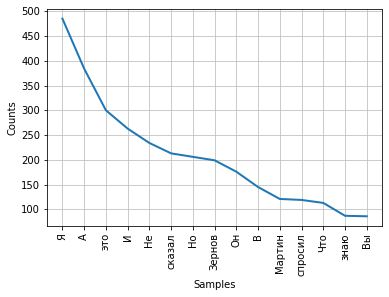

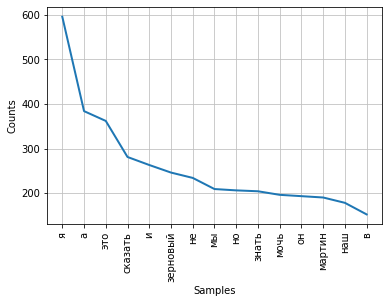

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
import nltk
import re
import pymorphy2
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.probability import FreqDist

filename = input('Введите имя файла')
morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

#Токенизация, и очистка слов. Получаю список словоформ и лемм.
words = nltk.word_tokenize(open(filename, encoding='utf8').read(), language = 'russian')
clear_words = re.findall(r'(?:\s|\b)([а-яА-Я]+)(?:\s|\b)', ' '.join(words))
words_forms = [word for word in clear_words if not word in stop_words]
lemmatized_words=[morph.parse(word)[0].normal_form for word in words_forms]

#Списки словоформ и лемм с их частотами
fdist_forms = FreqDist(words_forms)
fdist_lemma = FreqDist(lemmatized_words)

#Строю графики
fdist_forms.plot(15,cumulative = False)
fdist_lemma.plot(15, cumulative=False)

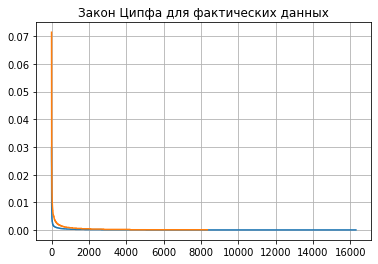

In [5]:
#Для проверки закона Ципфа вытаскиваю и сортирую относительные частоты
freq_forms = [v for k,v in fdist_forms.items()]
freq_lemma = [v for k,v in fdist_lemma.items()]

freq_forms = sorted(freq_forms,reverse = True)
freq_lemma = sorted(freq_lemma,reverse = True)

freq_forms = [freq_forms[i]/len(freq_forms) for i in range(len(freq_forms))]
freq_lemma = [freq_lemma[i]/len(freq_lemma) for i in range(len (freq_lemma))]

plt.grid()
plt.title('Закон Ципфа для фактических данных')
plt.plot(freq_forms)
plt.plot(freq_lemma)

In [6]:
#Топ 50 словоформ
fdist_forms.most_common(50)

[('Я', 485),
 ('А', 384),
 ('это', 300),
 ('И', 263),
 ('Не', 234),
 ('сказал', 213),
 ('Но', 206),
 ('Зернов', 199),
 ('Он', 176),
 ('В', 145),
 ('Мартин', 121),
 ('спросил', 119),
 ('Что', 113),
 ('знаю', 87),
 ('Вы', 86),
 ('Мы', 85),
 ('нам', 82),
 ('Вано', 72),
 ('Как', 69),
 ('Может', 67),
 ('Толька', 64),
 ('почему', 63),
 ('На', 59),
 ('Она', 59),
 ('Почему', 59),
 ('У', 59),
 ('просто', 58),
 ('словно', 58),
 ('Все', 57),
 ('Ты', 56),
 ('Только', 55),
 ('видел', 55),
 ('Ирина', 55),
 ('Они', 54),
 ('Так', 53),
 ('Это', 52),
 ('глаза', 51),
 ('Кто', 50),
 ('Мартина', 50),
 ('Мне', 48),
 ('время', 48),
 ('жизнь', 47),
 ('ответил', 46),
 ('Зернова', 46),
 ('мог', 44),
 ('Анохин', 44),
 ('Ланге', 44),
 ('облака', 43),
 ('С', 41),
 ('таки', 41)]

In [7]:
#Топ 50 лемм
fdist_lemma.most_common(50)

[('я', 596),
 ('а', 384),
 ('это', 362),
 ('сказать', 281),
 ('и', 263),
 ('зерновый', 246),
 ('не', 234),
 ('мы', 209),
 ('но', 206),
 ('знать', 204),
 ('мочь', 196),
 ('он', 193),
 ('мартин', 190),
 ('наш', 178),
 ('в', 152),
 ('спросить', 152),
 ('какой', 149),
 ('человек', 144),
 ('облако', 133),
 ('видеть', 133),
 ('почему', 122),
 ('что', 122),
 ('свой', 117),
 ('мой', 116),
 ('вы', 115),
 ('говорить', 112),
 ('такой', 107),
 ('ты', 101),
 ('город', 100),
 ('который', 99),
 ('глаз', 98),
 ('один', 98),
 ('двойник', 93),
 ('жизнь', 91),
 ('кто', 90),
 ('они', 88),
 ('розовый', 86),
 ('тот', 85),
 ('толька', 84),
 ('ирина', 83),
 ('лёд', 81),
 ('весь', 79),
 ('рука', 78),
 ('самый', 74),
 ('анохин', 73),
 ('время', 73),
 ('вано', 72),
 ('она', 72),
 ('первый', 71),
 ('просто', 71)]